# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import data

# Path to course data folder
data_folder_fp = os.path.join('/',
                              'courses',
                              'EDS220', 
                              'data')

# Import and simplify states polygons
states = gpd.read_file(os.path.join(data_folder_fp, 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join(data_folder_fp,
                                    'ne_50m_populated_places',
                                    'ne_50m_populated_places.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join(data_folder_fp,
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [4]:
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

## Prepare Alaska multipolygon

This is a geospatial dataset, you should always *at least* check the following:

CRS, plotting the data, and head of the dataset.

In [5]:
print(f"CRS: {states.crs}")

states.head(3)

CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

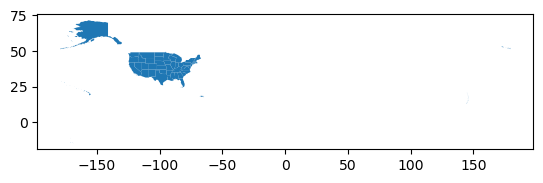

In [6]:
states.plot()

For this lesson, we are interested in plotting data in Alaska only. 

In [7]:
alaska = states[states.name == 'Alaska']

<Axes: >

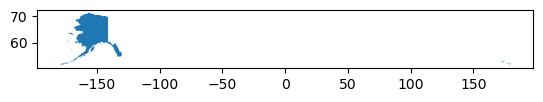

In [10]:
alaska.plot()

Notice the multipolygon is plotted under the NAD83/EPSG:4269 CTS (common for US agencies data) and this unnaturally elongates the map.

Let's reproject to EPSG:3338, this is a *projected* CRS.

In [11]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

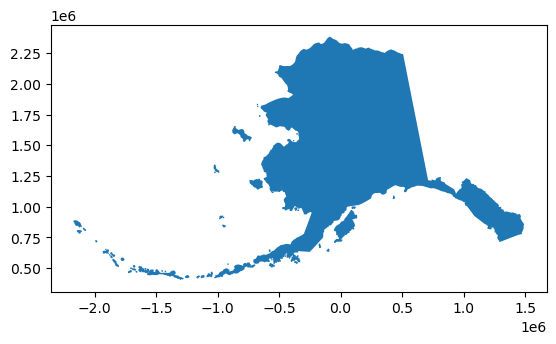

In [12]:
alaska.plot()

## Prepare populated places points

Lets explore the data:

In [13]:
places.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

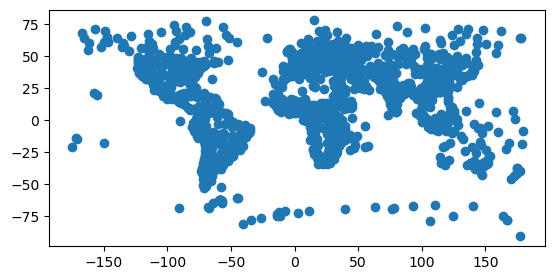

In [14]:
places.plot()

This dataset has the EPSG:4326 CRS. Remember this is the EPSG code for the WGS 84 CRS. This is not a surprise since the places data is global and EPSG:4326/WGS84 is the most widely used CRS for such data.

Let’s see what happens when we try to plot this data on top of Alaska:

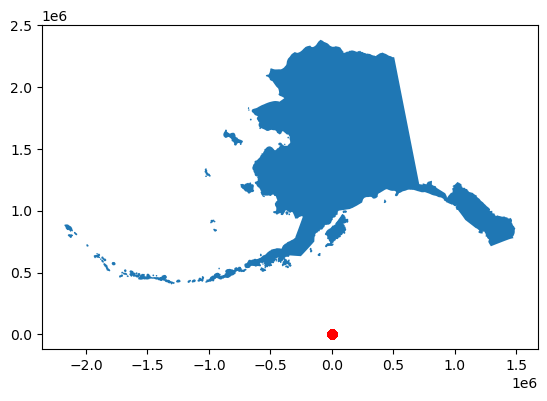

In [16]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red')

plt.show()

**If your data is in weird places, check that the CRSs match**

Lets update the CRSs use an `if-else` statement:

In [17]:
 if alaska.crs == places.crs:
        print('CRSs match')
else:
    places = places.to_crs(alaska.crs)
    assert places.crs == alaska.crs
    print('We matched the CRSs')

We matched the CRSs


Remember that an `if-else` statement a control structure that allows code to make decision:

- it checks a condition,
- if that condition is true, it executes one block of the code (the `if` block)
- if the condition is false, it executes a different block (the `else` block)

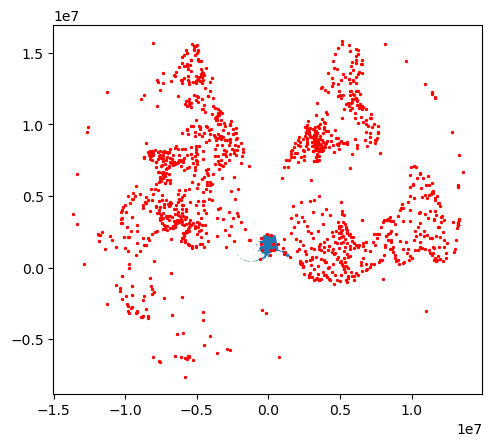

In [18]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red', markersize = 2)

plt.show()

## Clipping

**Clipping** means using a polygon (or polygons) to select only geospatial data within them.
This is simple with a `geopands.GeoDataFrame` using the `clip()` function:

```python
updated_geodf = geopandas.clip(geodf, mask)
```
where

- `updated_geodf` = output of the method, the **intersection** of the geometries in `geodf` with the `mask`
- `geodf` = `gpd.geodf` we want to clip
- `mask` = `gpd.geodf` with the polygons we want to use for clipping. The mask needs to be in the same CRS as the geodf.

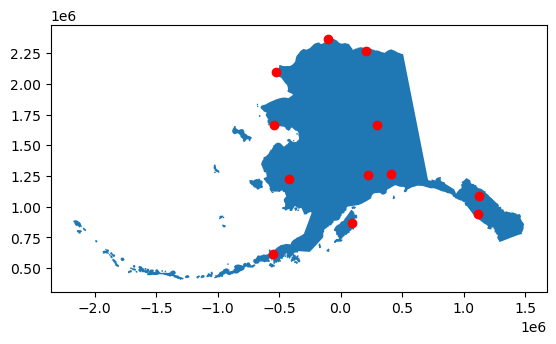

In [19]:
# Clip populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

## Prepare roads data

In [20]:
roads.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
roads.head(3)

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

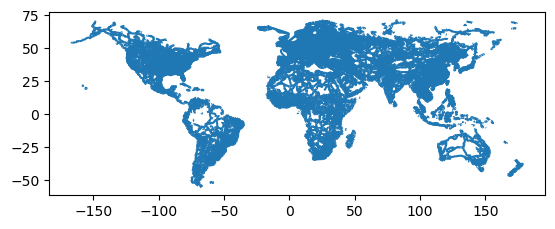

In [22]:
roads.plot()

Before clipping or reprojecting we will subset the data to select only US roads.

**BEST PRACTICE**
Reduce your tabular data before reducing via geometries.

<Axes: >

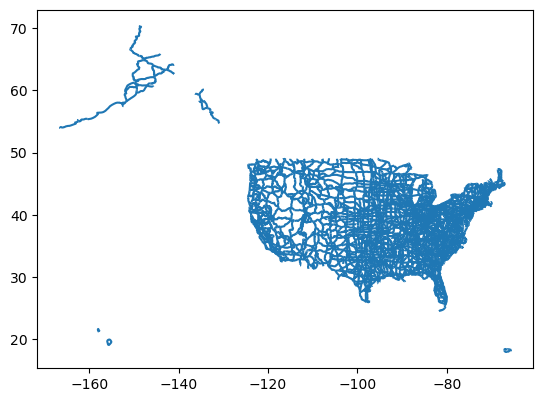

In [23]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

We will now compose functions to clip `usa_roads` and `alaska` multipolygon.

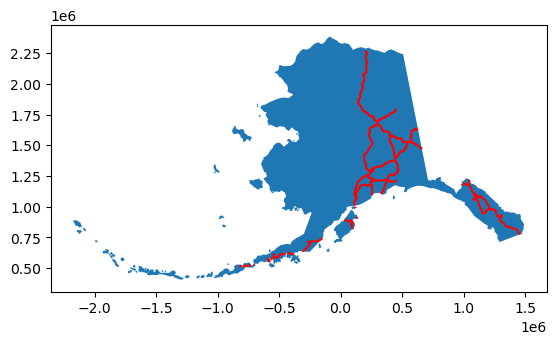

In [24]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color='red')
plt.show()

## Clipping with a bounding box

We will clip the `usa_roads` geo-dataframe with the **bounding box** of `alaska` instead of its polygons.

To create a bounding box we will use the `box()` function from `shapely.geometry`. The syntax for the box is:

```python
box(minx, miny, maxx, maxy)
```

The output is a polygon representing a box constructed like this:

SHOW DIAGRAM

If wwe want to create a `shapely` polygon form the bounds of a geo-df `gdf` we can use this syntax:

```python
box(*gdf.total_bounds)
```

In [25]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

<class 'shapely.geometry.polygon.Polygon'>


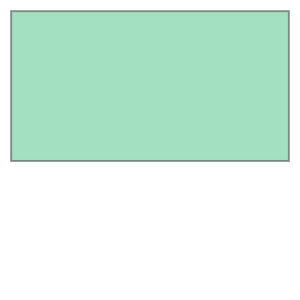

In [26]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

### * = unpacking operator

In the last syntax we used an asterisk * as an ***unpacking operator*** on the array `alaska.total_bounds`. Think about it as unpacking the elements of `alaska.total_bounds` and passing them one-by-one to the parameters `minx`, `miny`, `maxx`, `maxy` of the `box()` function.

In [27]:
# Create geo-dataframe from bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox],  # Assign geometry column
                           crs = alaska.crs)  # Assign CRS
print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


In [30]:
# Clip roads using Alaska bounding box
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

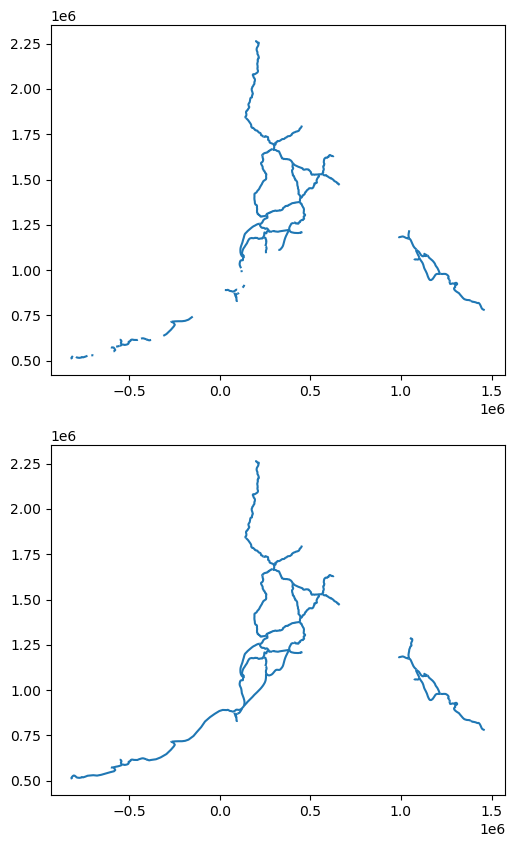

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax = ax1)

ak_complete_roads.plot(ax=ax2)

plt.show()

Let's plot all the layers together

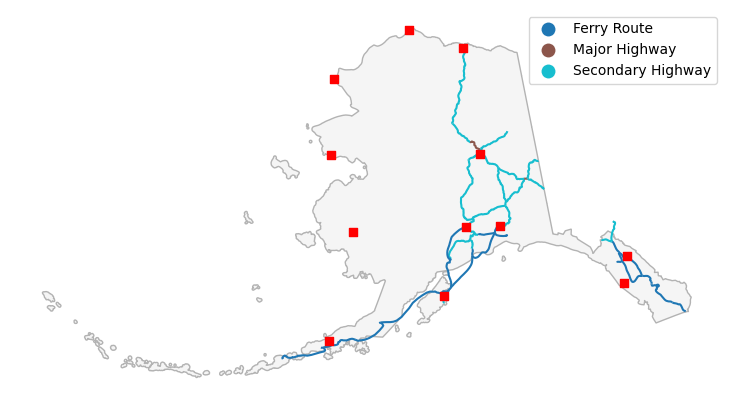

In [37]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color = 'whitesmoke', edgecolor = '0.7')

ak_complete_roads.plot(ax=ax,
                      column='type',
                      legend=True)

ak_places.plot(ax=ax,
               zorder = 2,
             color='red',
             marker='s' # Square marker
             )

plt.show()

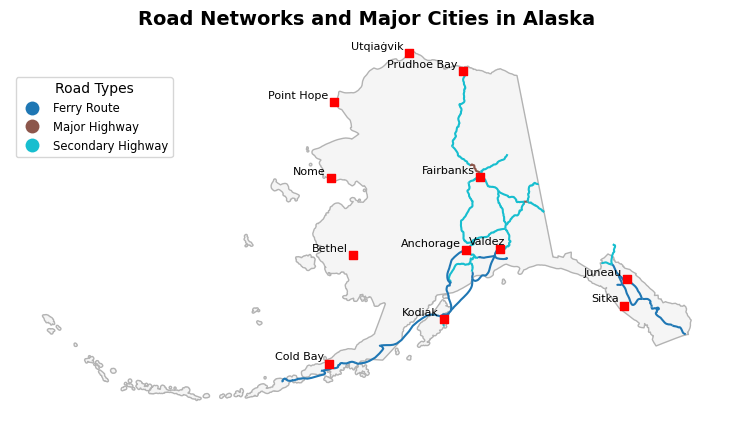

In [48]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

# Add city names as text annotations

for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name != 'Valdez': # Skip Valdez
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')
    else:
        ax.text(x+30000, y+20000, name, fontsize=8, ha='right')

# Plot Valdez point individually
#valdez = ak_places[ak_places['name'] == 'Valdez']
#ax.text(valdez.geometry.x.iloc[0]+30000, 
 #       valdez.geometry.y.iloc[0]+20000, 
  #      'Valdez', 
   #     fontsize=8, 
    #    ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()